# Importar GPPs das Torres, Alg e Satélite

In [3]:
%run ./load_flux_towers_data.ipynb

# Importações

In [4]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
from mod17 import MOD17

# Calculando GPP com a BPLUT Otimizada Mensal - Lue Otimizado - Santarem

In [5]:
bplut_mensal_santarem = pd.read_csv('GA_Santarem.csv')
bplut_mensal_santarem = bplut_mensal_santarem[['LUE_Max', 'Tmin_min', 'Tmin_max', 'VPD_min', 'VPD_max']].to_numpy()

num_mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in range(12):
    previsoes_santarem = MOD17._gpp(bplut_mensal_santarem[i], drivers_santarem_mes['arr_'+str(i)][0], drivers_santarem_mes['arr_'+str(i)][1], drivers_santarem_mes['arr_'+str(i)][2], drivers_santarem_mes['arr_'+str(i)][3])
    previsoes_santarem = pd.DataFrame(previsoes_santarem,index=index_santarem[index_santarem.month == i+1])
    
   

    #previsoes_santarem_pso = pd.concat([gpp_kgc_8d_2009_teste[ano2009],gpp_kgc_8d_2010_teste[ano2010],gpp_kgc_8d_2011_teste[ano2011]],axis=0)
    if i > 0:
        previsoes_santarem_2002 = pd.concat([previsoes_santarem_2002, previsoes_santarem['2002':'2002']], axis=0)
        previsoes_santarem_2003 = pd.concat([previsoes_santarem_2003, previsoes_santarem['2003':'2003']], axis=0)
        previsoes_santarem_2004 = pd.concat([previsoes_santarem_2004, previsoes_santarem['2004':'2004']], axis=0)
        previsoes_santarem_2005 = pd.concat([previsoes_santarem_2005, previsoes_santarem['2005':'2005']], axis=0)
        previsoes_santarem_2006 = pd.concat([previsoes_santarem_2006, previsoes_santarem['2006':'2006']], axis=0)
        previsoes_santarem_2008 = pd.concat([previsoes_santarem_2008, previsoes_santarem['2008':'2008']], axis=0)
        previsoes_santarem_2009 = pd.concat([previsoes_santarem_2009, previsoes_santarem['2009':'2009']], axis=0)
        previsoes_santarem_2010 = pd.concat([previsoes_santarem_2010, previsoes_santarem['2010':'2010']], axis=0)
        previsoes_santarem_2011 = pd.concat([previsoes_santarem_2011, previsoes_santarem['2011':'2011']], axis=0)
    else:
        previsoes_santarem_2002 = previsoes_santarem['2002':'2002']
        previsoes_santarem_2003 = previsoes_santarem['2003':'2003']
        previsoes_santarem_2004 = previsoes_santarem['2004':'2004']
        previsoes_santarem_2005 = previsoes_santarem['2005':'2005']
        previsoes_santarem_2006 = previsoes_santarem['2006':'2006']
        previsoes_santarem_2008 = previsoes_santarem['2008':'2008']
        previsoes_santarem_2009 = previsoes_santarem['2009':'2009']
        previsoes_santarem_2010 = previsoes_santarem['2010':'2010']
        previsoes_santarem_2011 = previsoes_santarem['2011':'2011']

previsoes_santarem_diario = pd.concat([previsoes_santarem_2002,
                                        previsoes_santarem_2003,
                                        previsoes_santarem_2004,
                                        previsoes_santarem_2005,
                                        previsoes_santarem_2006,
                                        previsoes_santarem_2008,
                                        previsoes_santarem_2009,
                                        previsoes_santarem_2010,
                                        previsoes_santarem_2011], axis=0)
'''
gpp_2002 = previsoes_santarem_2002.resample('8D').sum()
gpp_2003 = previsoes_santarem_2003.resample('8D').sum()
gpp_2004 = previsoes_santarem_2004.resample('8D').sum()
gpp_2005 = previsoes_santarem_2005.resample('8D').sum()
gpp_2006 = previsoes_santarem_2006.resample('8D').sum()
gpp_2008 = previsoes_santarem_2008.resample('8D').sum()
gpp_2009 = previsoes_santarem_2009.resample('8D').sum()
gpp_2010 = previsoes_santarem_2010.resample('8D').sum()
gpp_2011 = previsoes_santarem_2011.resample('8D').sum()

previsoes_santarem = pd.concat([gpp_2002,
                                gpp_2003,
                                gpp_2004,
                                gpp_2005,
                                gpp_2006,
                                gpp_2008, 
                                gpp_2009, 
                                gpp_2010, 
                                gpp_2011],axis=0)
'''
rmse_santarem = np.sqrt(mean_squared_error(y_true=observacoes_santarem_diario, y_pred=previsoes_santarem_diario))

# Plots do GPP Santarem

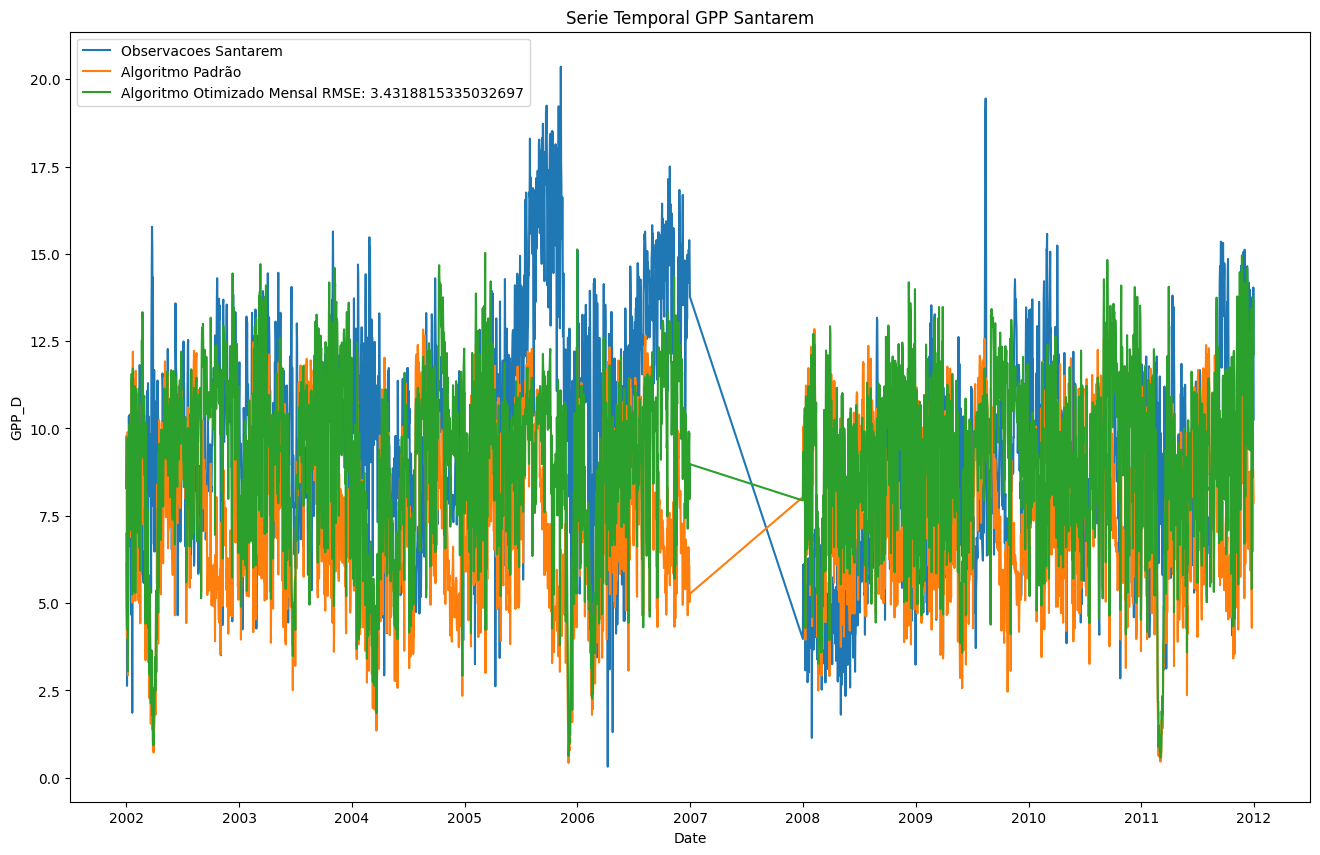

In [6]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.xlabel("Date")
plt.ylabel("GPP_D")
plt.title("Serie Temporal GPP Santarem")

plt.plot(observacoes_santarem_diario)
plt.plot(gpp_algpad_santarem_diario)
#plt.plot(gpp_modis_santarem)
plt.plot(previsoes_santarem_diario)

plt.legend(['Observacoes Santarem', 'Algoritmo Padrão', 'Algoritmo Otimizado Mensal RMSE: ' + str(rmse_santarem)])


# Box Plot Santarem

C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\2749254028.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observacoes_santarem_monthly = observacoes_santarem_diario.resample('M').mean()
C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\2749254028.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_params_santarem_monthly = previsoes_santarem_diario.squeeze().resample('M').mean()
C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\2749254028.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  smoothed_gpp_algpad_santarem_monthly = gpp_algpad_santarem_diario.resample('M').mean()


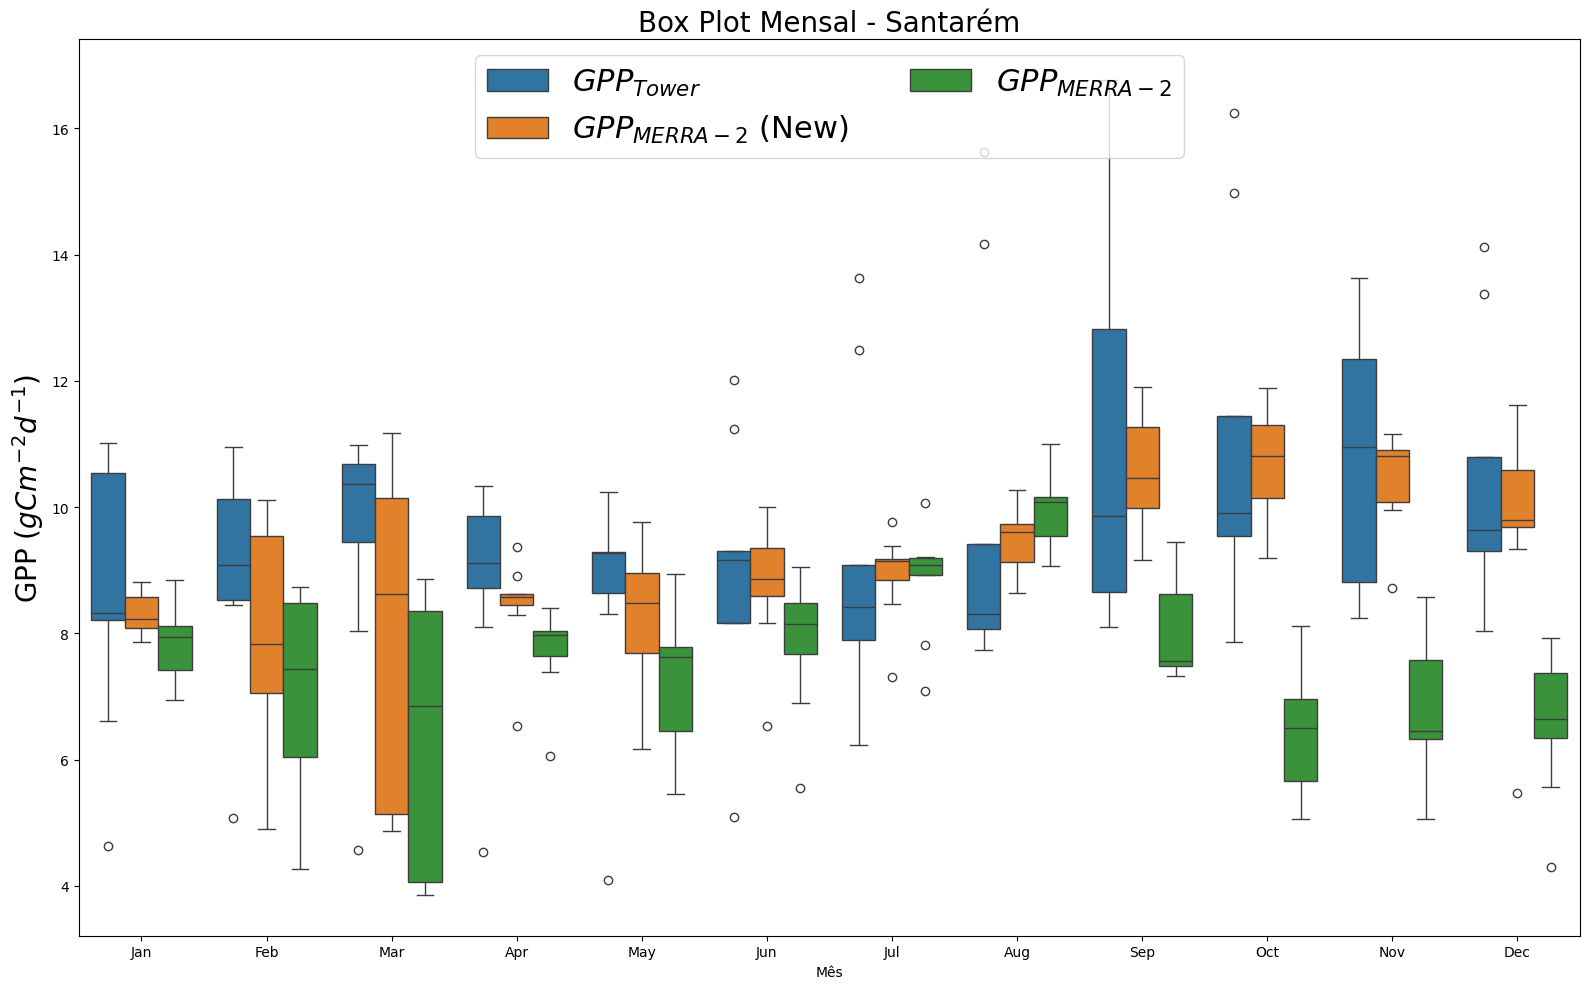

In [7]:
# Definindo os dados mensais de Santarém
observacoes_santarem_monthly = observacoes_santarem_diario.resample('M').mean()
new_params_santarem_monthly = previsoes_santarem_diario.squeeze().resample('M').mean()
#santarem_gpp_mod_monthly = gpp_modis_santarem.resample('M').mean()
smoothed_gpp_algpad_santarem_monthly = gpp_algpad_santarem_diario.resample('M').mean()

# Criando DataFrame para Santarém com os dados resampleados
df_santarem = pd.DataFrame({
    '$GPP_{Tower}$': observacoes_santarem_monthly,
    '$GPP_{MERRA-2}$ (New)': new_params_santarem_monthly,
    '$GPP_{MERRA-2}$': smoothed_gpp_algpad_santarem_monthly
#    '$GPP_{MOD17}$': santarem_gpp_mod_monthly,
})

# Resetando o índice para ter uma coluna de datas
df_santarem.reset_index(inplace=True)

# Derretendo o DataFrame para ter todas as variáveis em uma única coluna
df_santarem_melted = df_santarem.melt(id_vars='index', var_name='Medição de GPP', value_name='Valor')

# Obtendo o ano e o mês de cada data
df_santarem_melted['Ano'] = df_santarem_melted['index'].dt.year
df_santarem_melted['Mes'] = df_santarem_melted['index'].dt.strftime('%b')

# Plotando os boxplots em subplots
fig, axes = plt.subplots(figsize=(16, 10))  # Criando subplots com 2 linhas e 1 coluna

# Boxplot para Santarém
sns.boxplot(data=df_santarem_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes)
axes.set_title('Box Plot Mensal - Santarém', fontsize=20)  # Definindo título
axes.set_ylabel('GPP ($gCm^{-2}d^{-1}$)', fontsize=20)  # Definindo rótulo do eixo y
axes.set_xlabel('Mês')  # Definindo rótulo do eixo x
axes.legend(loc='upper center', fontsize=22, ncol=2)  # Definindo legenda
plt.tight_layout()  # Ajustando layout
plt.savefig('BoxPlot_Santarem.png', dpi=300, bbox_inches='tight', pad_inches=0.2)  # Salvando figura
plt.show()

# Calculando GPP com a BPLUT Otimizada Mensal - Lue Otimizado - Peru

In [8]:
bplut_mensal_peru = pd.read_csv('GA_Peru.csv')
bplut_mensal_peru = bplut_mensal_peru[['LUE_Max', 'Tmin_min', 'Tmin_max', 'VPD_min', 'VPD_max']].to_numpy()

num_mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in range(12):
    previsoes_peru = MOD17._gpp(bplut_mensal_peru[i], drivers_peru_mes['arr_'+str(i)][0], drivers_peru_mes['arr_'+str(i)][1], drivers_peru_mes['arr_'+str(i)][2], drivers_peru_mes['arr_'+str(i)][3])
    previsoes_peru = pd.DataFrame(previsoes_peru,index=index_peru[index_peru.month == i+1])
    
    
   
    if i > 0:
        previsoes_peru_2018 = pd.concat([previsoes_peru_2018, previsoes_peru['2018':'2018']], axis=0)
        previsoes_peru_2019 = pd.concat([previsoes_peru_2019, previsoes_peru['2019':'2019']], axis=0)
        
    else:
        previsoes_peru_2018 = previsoes_peru['2018':'2018']
        previsoes_peru_2019 = previsoes_peru['2019':'2019']
        
previsoes_peru_diario = pd.concat([previsoes_peru_2018, previsoes_peru_2019], axis=0)
'''
gpp_2018 = previsoes_peru_2018.resample('8D').sum()
gpp_2019 = previsoes_peru_2019.resample('8D').sum()
'''

#previsoes_peru = pd.concat([gpp_2018,gpp_2019],axis=0)
rmse_peru = np.sqrt(mean_squared_error(y_true=observacoes_peru_diario, y_pred=previsoes_peru_diario))

# Plot do GPP Peru

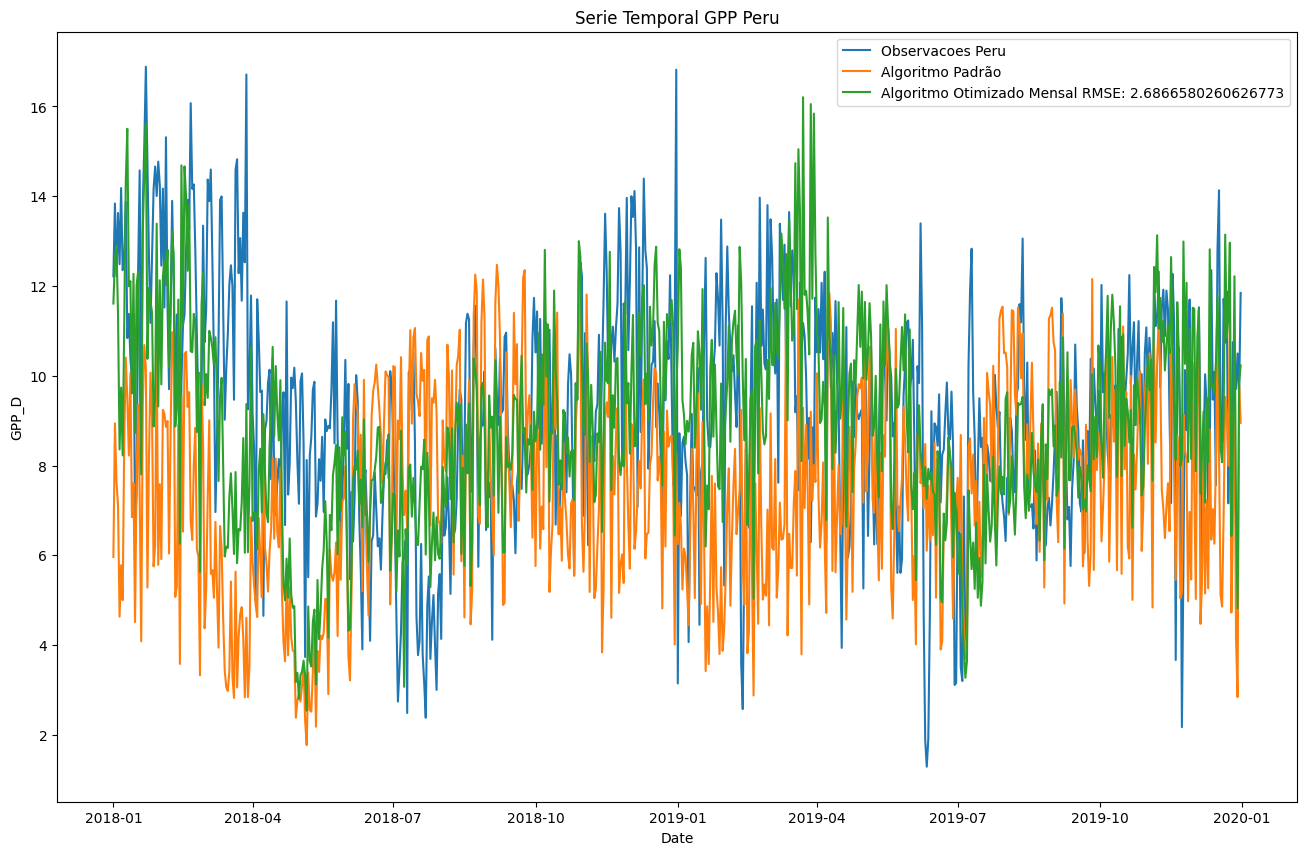

In [9]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.xlabel("Date")
plt.ylabel("GPP_D")
plt.title("Serie Temporal GPP Peru")

plt.plot(observacoes_peru_diario)
plt.plot(gpp_algpad_peru_diario)
#plt.plot(gpp_modis_peru)
plt.plot(previsoes_peru_diario)

plt.legend(['Observacoes Peru', 'Algoritmo Padrão', 'Algoritmo Otimizado Mensal RMSE: ' + str(rmse_peru)])

# Box Plot Peru

C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\489531629.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observacoes_peru_monthly = observacoes_peru_diario.resample('M').mean()
C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\489531629.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_params_peru_monthly = previsoes_peru_diario.squeeze().resample('M').mean()
C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\489531629.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  smoothed_gpp_algpad_peru_monthly = gpp_algpad_peru_diario.resample('M').mean()


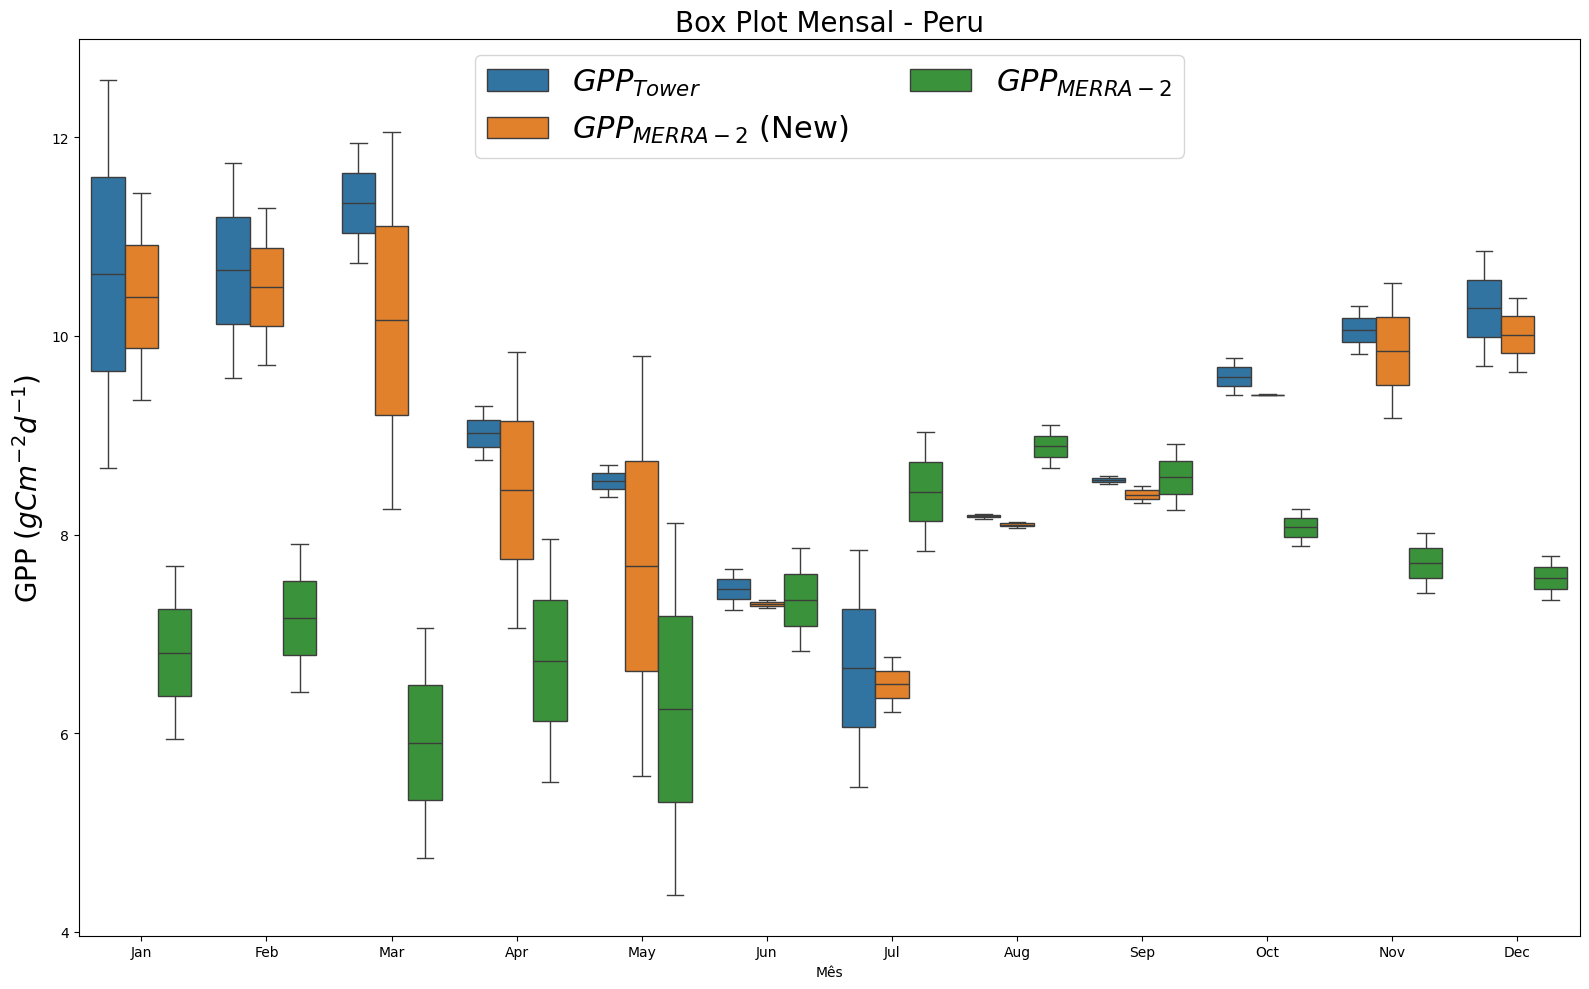

In [10]:
# Definindo os dados mensais de Peru
observacoes_peru_monthly = observacoes_peru_diario.resample('M').mean()
new_params_peru_monthly = previsoes_peru_diario.squeeze().resample('M').mean()
#peru_gpp_mod_monthly = gpp_modis_peru.resample('M').mean()
smoothed_gpp_algpad_peru_monthly = gpp_algpad_peru_diario.resample('M').mean()

# Criando DataFrame para Peru com os dados resampleados
df_peru = pd.DataFrame({
    '$GPP_{Tower}$': observacoes_peru_monthly,
    '$GPP_{MERRA-2}$ (New)': new_params_peru_monthly,
    '$GPP_{MERRA-2}$': smoothed_gpp_algpad_peru_monthly,
 #   '$GPP_{MOD17}$': peru_gpp_mod_monthly
})

# Resetando o índice para ter uma coluna de datas
df_peru.reset_index(inplace=True)

# Derretendo o DataFrame para ter todas as variáveis em uma única coluna
df_peru_melted = df_peru.melt(id_vars='index', var_name='Medição de GPP', value_name='Valor')

# Obtendo o ano e o mês de cada data
df_peru_melted['Ano'] = df_peru_melted['index'].dt.year
df_peru_melted['Mes'] = df_peru_melted['index'].dt.strftime('%b')


# Plotando os boxplots em subplots
fig, axes = plt.subplots(figsize=(16, 10)) 

# Boxplot para Peru
sns.boxplot(data=df_peru_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes)
axes.set_title('Box Plot Mensal - Peru', fontsize=20)  # Definindo título
axes.set_ylabel('GPP ($gCm^{-2}d^{-1}$)', fontsize=20)  # Definindo rótulo do eixo y
axes.set_xlabel('Mês')  # Definindo rótulo do eixo x
axes.legend(loc='upper center', fontsize=22, ncol=2)  # Definindo legenda

plt.tight_layout()  # Ajustando layout
plt.savefig('BoxPlot_Peru.png', dpi=300, bbox_inches='tight', pad_inches=0.2)  # Salvando figura
plt.show()

## Calculando GPP com a BPLUT Otimizada Mensal - Lue Otimizado - Caxiuana

In [11]:
bplut_mensal_caxiuana = pd.read_csv('GA_Caxiuana.csv')
bplut_mensal_caxiuana = bplut_mensal_caxiuana[['LUE_Max', 'Tmin_min', 'Tmin_max', 'VPD_min', 'VPD_max']].to_numpy()

num_mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in range(12):
    previsoes_caxiuana = MOD17._gpp(bplut_mensal_caxiuana[i], drivers_caxiuana_mes['arr_'+str(i)][0], drivers_caxiuana_mes['arr_'+str(i)][1], drivers_caxiuana_mes['arr_'+str(i)][2], drivers_caxiuana_mes['arr_'+str(i)][3])
    previsoes_caxiuana = pd.DataFrame(previsoes_caxiuana,index=index_caxiuana[index_caxiuana.month == i+1])
   
    if i > 0:
        previsoes_caxiuana_2005 = pd.concat([previsoes_caxiuana_2005, previsoes_caxiuana['2005':'2005']], axis=0)
        previsoes_caxiuana_2006 = pd.concat([previsoes_caxiuana_2006, previsoes_caxiuana['2006':'2006']], axis=0)
        previsoes_caxiuana_2007 = pd.concat([previsoes_caxiuana_2007, previsoes_caxiuana['2007':'2007']], axis=0)
        previsoes_caxiuana_2008 = pd.concat([previsoes_caxiuana_2008, previsoes_caxiuana['2008':'2008']], axis=0)
        
    else:
        previsoes_caxiuana_2005 = previsoes_caxiuana['2005':'2005']
        previsoes_caxiuana_2006 = previsoes_caxiuana['2006':'2006']
        previsoes_caxiuana_2007 = previsoes_caxiuana['2007':'2007']
        previsoes_caxiuana_2008 = previsoes_caxiuana['2008':'2008']
        
previsoes_caxiuana_diario = pd.concat([previsoes_caxiuana_2005,
                                       previsoes_caxiuana_2006,
                                       previsoes_caxiuana_2007,
                                       previsoes_caxiuana_2008], axis=0)
'''
gpp_2005 = previsoes_caxiuana_2005.resample('8D').sum()
gpp_2006 = previsoes_caxiuana_2006.resample('8D').sum()
gpp_2007 = previsoes_caxiuana_2007.resample('8D').sum()
gpp_2008 = previsoes_caxiuana_2008.resample('8D').sum()


previsoes_caxiuana = pd.concat([gpp_2005,gpp_2006,gpp_2007,gpp_2008],axis=0)
'''
rmse_caxiuana = np.sqrt(mean_squared_error(y_true=observacoes_caxiuana_diario, y_pred=previsoes_caxiuana_diario))

# Plot GPP Caxiuana

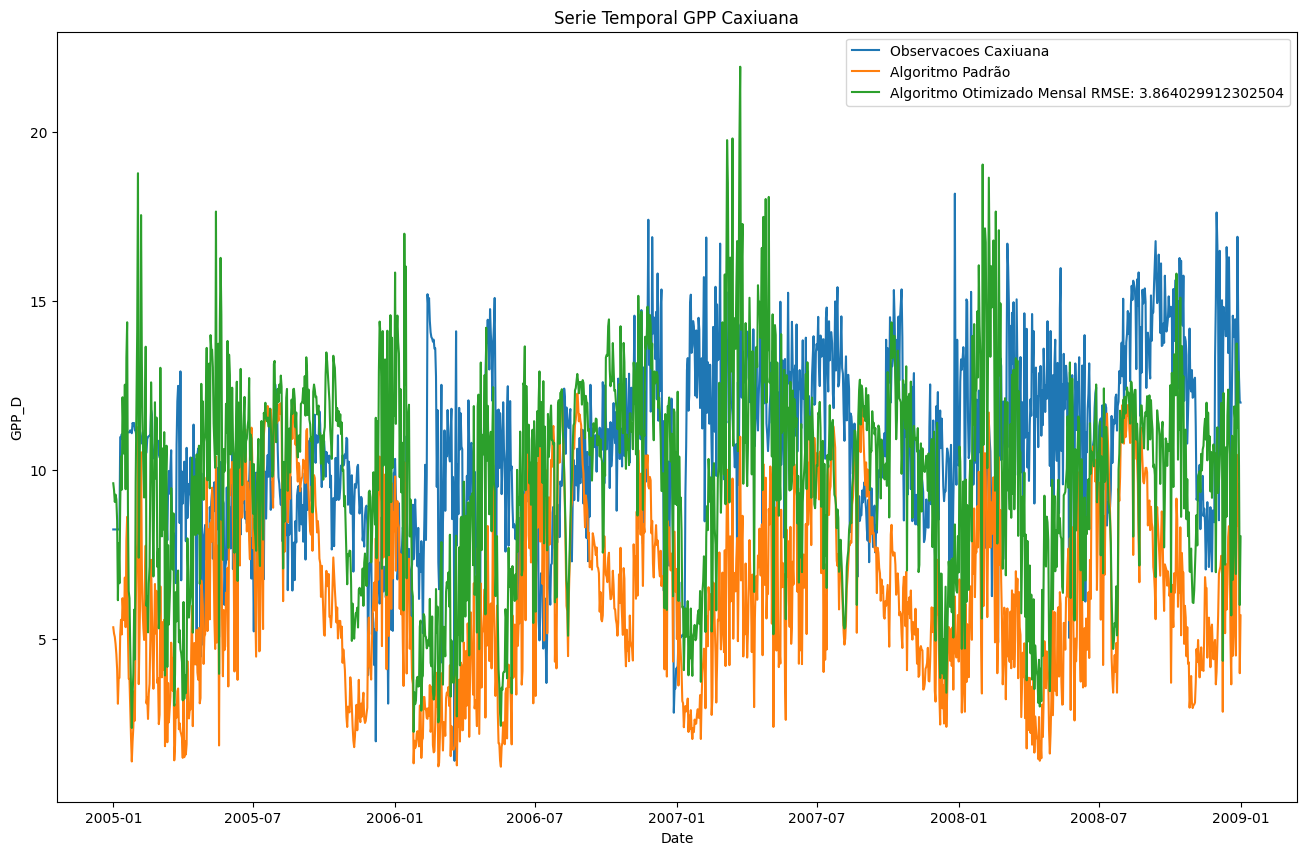

In [12]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.xlabel("Date")
plt.ylabel("GPP_D")
plt.title("Serie Temporal GPP Caxiuana")

plt.plot(observacoes_caxiuana_diario)
plt.plot(gpp_algpad_caxiuana_diario)
#plt.plot(gpp_modis_caxiuana)
plt.plot(previsoes_caxiuana_diario)

plt.legend(['Observacoes Caxiuana', 'Algoritmo Padrão', 'Algoritmo Otimizado Mensal RMSE: ' + str(rmse_caxiuana)])

# Box Plot Caxiuana

C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\2661956480.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observacoes_caxiuana_monthly = observacoes_caxiuana_diario.resample('M').mean()
C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\2661956480.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_params_caxiuana_monthly = previsoes_caxiuana_diario.squeeze().resample('M').mean()
C:\Users\alanb\AppData\Local\Temp\ipykernel_12768\2661956480.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  smoothed_gpp_algpad_caxiuana_monthly = gpp_algpad_caxiuana_diario.resample('M').mean()


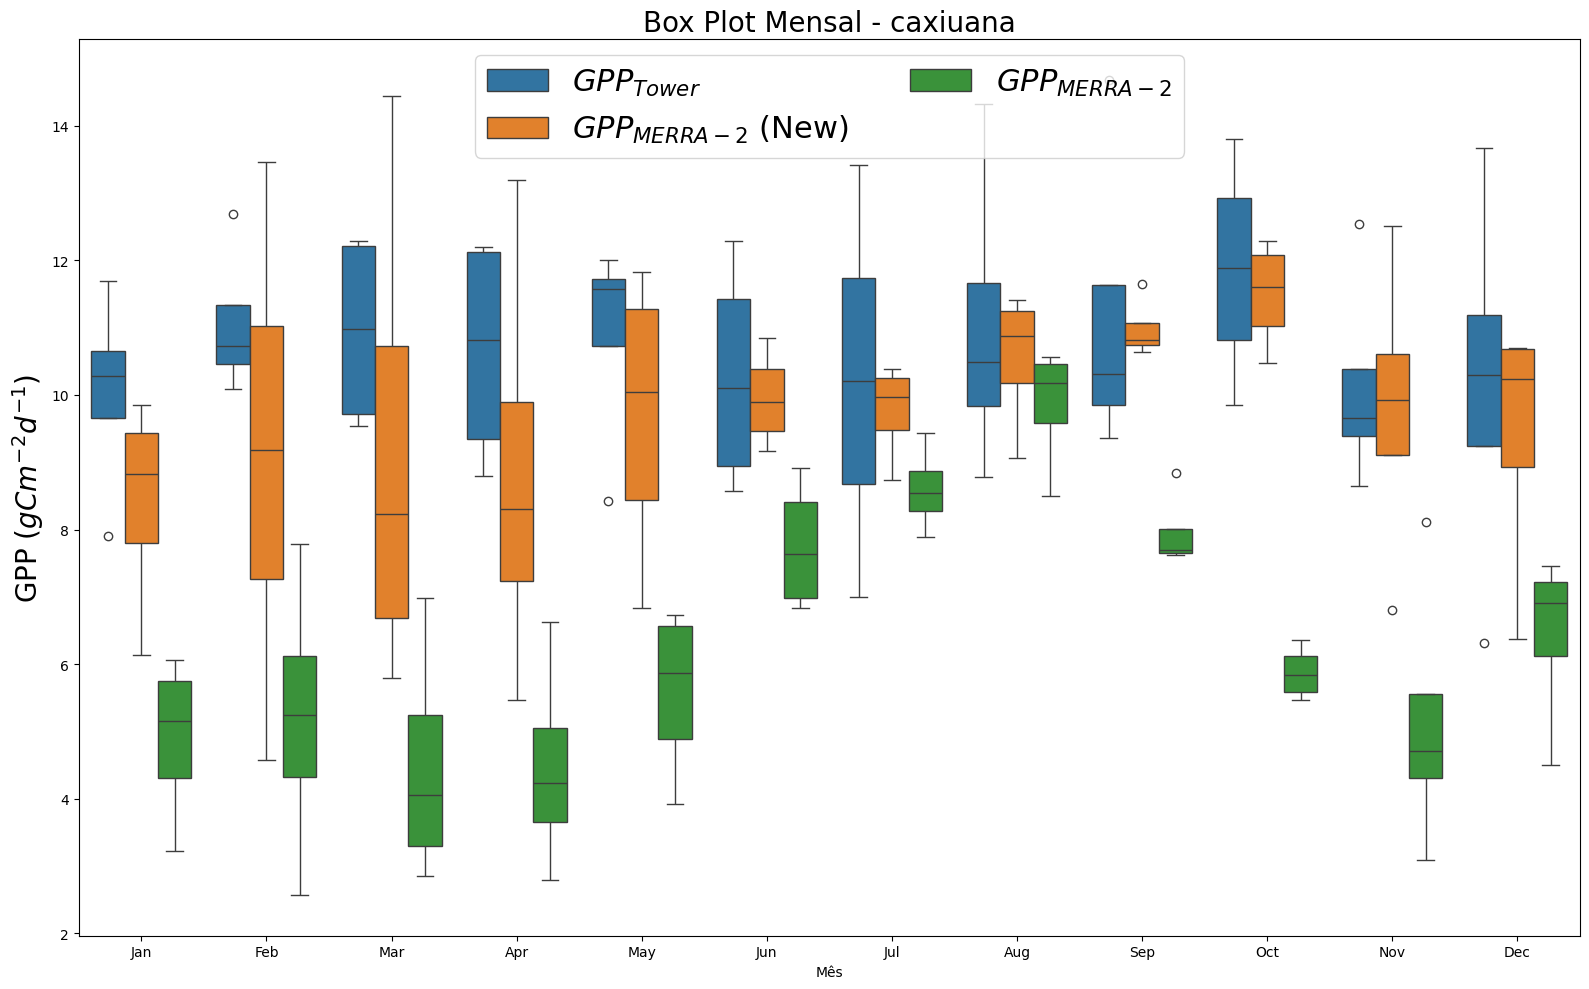

In [13]:
# Definindo os dados mensais de caxiuana
observacoes_caxiuana_monthly = observacoes_caxiuana_diario.resample('M').mean()
new_params_caxiuana_monthly = previsoes_caxiuana_diario.squeeze().resample('M').mean()
#caxiuana_gpp_mod_monthly = gpp_modis_caxiuana.resample('M').mean()
smoothed_gpp_algpad_caxiuana_monthly = gpp_algpad_caxiuana_diario.resample('M').mean()

# Criando DataFrame para caxiuana com os dados resampleados
df_caxiuana = pd.DataFrame({
    '$GPP_{Tower}$': observacoes_caxiuana_monthly,
    '$GPP_{MERRA-2}$ (New)': new_params_caxiuana_monthly,
    '$GPP_{MERRA-2}$': smoothed_gpp_algpad_caxiuana_monthly,
#    '$GPP_{MOD17}$': caxiuana_gpp_mod_monthly
})

# Resetando o índice para ter uma coluna de datas
df_caxiuana.reset_index(inplace=True)

# Derretendo o DataFrame para ter todas as variáveis em uma única coluna
df_caxiuana_melted = df_caxiuana.melt(id_vars='index', var_name='Medição de GPP', value_name='Valor')

# Obtendo o ano e o mês de cada data
df_caxiuana_melted['Ano'] = df_caxiuana_melted['index'].dt.year
df_caxiuana_melted['Mes'] = df_caxiuana_melted['index'].dt.strftime('%b')


# Plotando os boxplots em subplots
fig, axes = plt.subplots(figsize=(16, 10)) 

# Boxplot para caxiuana
sns.boxplot(data=df_caxiuana_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes)
axes.set_title('Box Plot Mensal - caxiuana', fontsize=20)  # Definindo título
axes.set_ylabel('GPP ($gCm^{-2}d^{-1}$)', fontsize=20)  # Definindo rótulo do eixo y
axes.set_xlabel('Mês')  # Definindo rótulo do eixo x
axes.legend(loc='upper center', fontsize=22, ncol=2)  # Definindo legenda

plt.tight_layout()  # Ajustando layout
plt.savefig('BoxPlot_Caxiuana.png', dpi=300, bbox_inches='tight', pad_inches=0.2)  # Salvando figura
plt.show()

In [14]:
print(rmse_mes_algpad_santarem_diario)
bplut_mensal_santarem = pd.read_csv('GA_Santarem.csv')
bplut_mensal_santarem = bplut_mensal_santarem[['RMSE', 'Melhora %']].to_numpy().T
nome_mes = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
d_sant = {'Month': nome_mes,
     'RMSE': rmse_mes_algpad_santarem_diario,
     'RMSE New': bplut_mensal_santarem[0],
     'Melhora %': bplut_mensal_santarem[1]}

data_sant = pd.DataFrame(data=d_sant)

bplut_mensal_peru = pd.read_csv('GA_Peru.csv')
bplut_mensal_peru = bplut_mensal_peru[['RMSE', 'Melhora %']].to_numpy().T
d_peru = {'RMSE': rmse_mes_algpad_peru_diario,
        'RMSE New': bplut_mensal_peru[0],
        'Melhora %': bplut_mensal_peru[1]}

data_peru = pd.DataFrame(data=d_peru)

bplut_mensal_caxiuana = pd.read_csv('GA_Caxiuana.csv')
bplut_mensal_caxiuana = bplut_mensal_caxiuana[['RMSE', 'Melhora %']].to_numpy().T
d_caxiuana = {'RMSE': rmse_mes_algpad_caxiuana_diario,
        'RMSE New': bplut_mensal_caxiuana[0],
        'Melhora %': bplut_mensal_caxiuana[1]}

data_caxiuana = pd.DataFrame(data=d_caxiuana)

data = pd.concat([data_sant, data_peru, data_caxiuana], axis=1)
data

[3.30237318 4.11869262 4.79532407 3.40858845 3.25467316 3.09005983
 3.19356336 3.74225469 4.74670107 5.92530745 5.02088464 4.84884616]


,Month,RMSE,RMSE New,Melhora %,RMSE,RMSE New,Melhora %,RMSE,RMSE New,Melhora %
0,Janeiro,3.302373,3.100245,6.120705,4.871659,3.091713,36.536761,6.366963,5.025730,21.065504
1,Fevereiro,4.118693,3.902429,5.250784,4.340936,2.540600,41.473455,6.759745,5.200672,23.064075
2,Março,4.795324,4.408623,8.064120,6.295579,3.959094,37.113098,6.855708,4.111166,40.032948
3,Abril,3.408588,3.138684,7.918350,3.622368,2.915961,19.501252,6.771887,4.404764,34.955151
4,Maio,3.254673,2.793659,14.164698,3.558578,3.068803,13.763238,6.116510,4.095157,33.047495
5,Junho,3.090060,2.803277,9.280826,2.960284,2.582454,12.763306,3.881458,2.579259,33.549221
6,Julho,3.193563,2.976413,6.799619,3.457847,2.627761,24.005846,3.964330,3.540125,10.700552
7,Agosto,3.742255,3.633281,2.911993,2.209910,1.727221,21.842004,3.581875,3.443260,3.869901
8,Setembro,4.746701,3.728935,21.441547,2.439465,1.871918,23.265222,4.434384,2.900777,34.584453
9,Outubro,5.925307,3.741777,36.850924,2.709755,1.862434,31.269265,6.389239,2.889553,54.774692


In [15]:
d_total = { 'RMSE_s': rmse_algpad_santarem_diario,
            'RMSE_s New': rmse_santarem,
            'Melhora_s %': ((rmse_algpad_santarem_diario - rmse_santarem)/ rmse_algpad_santarem_diario)*100,
            'RMSE_p': rmse_algpad_peru_diario,
            'RMSE_p New': rmse_peru,
            'Melhora_p %': ((rmse_algpad_peru_diario - rmse_peru)/ rmse_algpad_peru_diario)*100,
            'RMSE_c': rmse_algpad_caxiuana_diario,
            'RMSE_c New': rmse_caxiuana,
            'Melhora_c %': ((rmse_algpad_caxiuana_diario - rmse_caxiuana)/ rmse_algpad_caxiuana_diario)*100,
            }

data_total = pd.DataFrame(data=d_total, index=[1])
data_total

,RMSE_s,RMSE_s New,Melhora_s %,RMSE_p,RMSE_p New,Melhora_p %,RMSE_c,RMSE_c New,Melhora_c %
1,4.216363,3.431882,18.605652,3.802094,2.686658,29.337421,5.62937,3.86403,31.359456


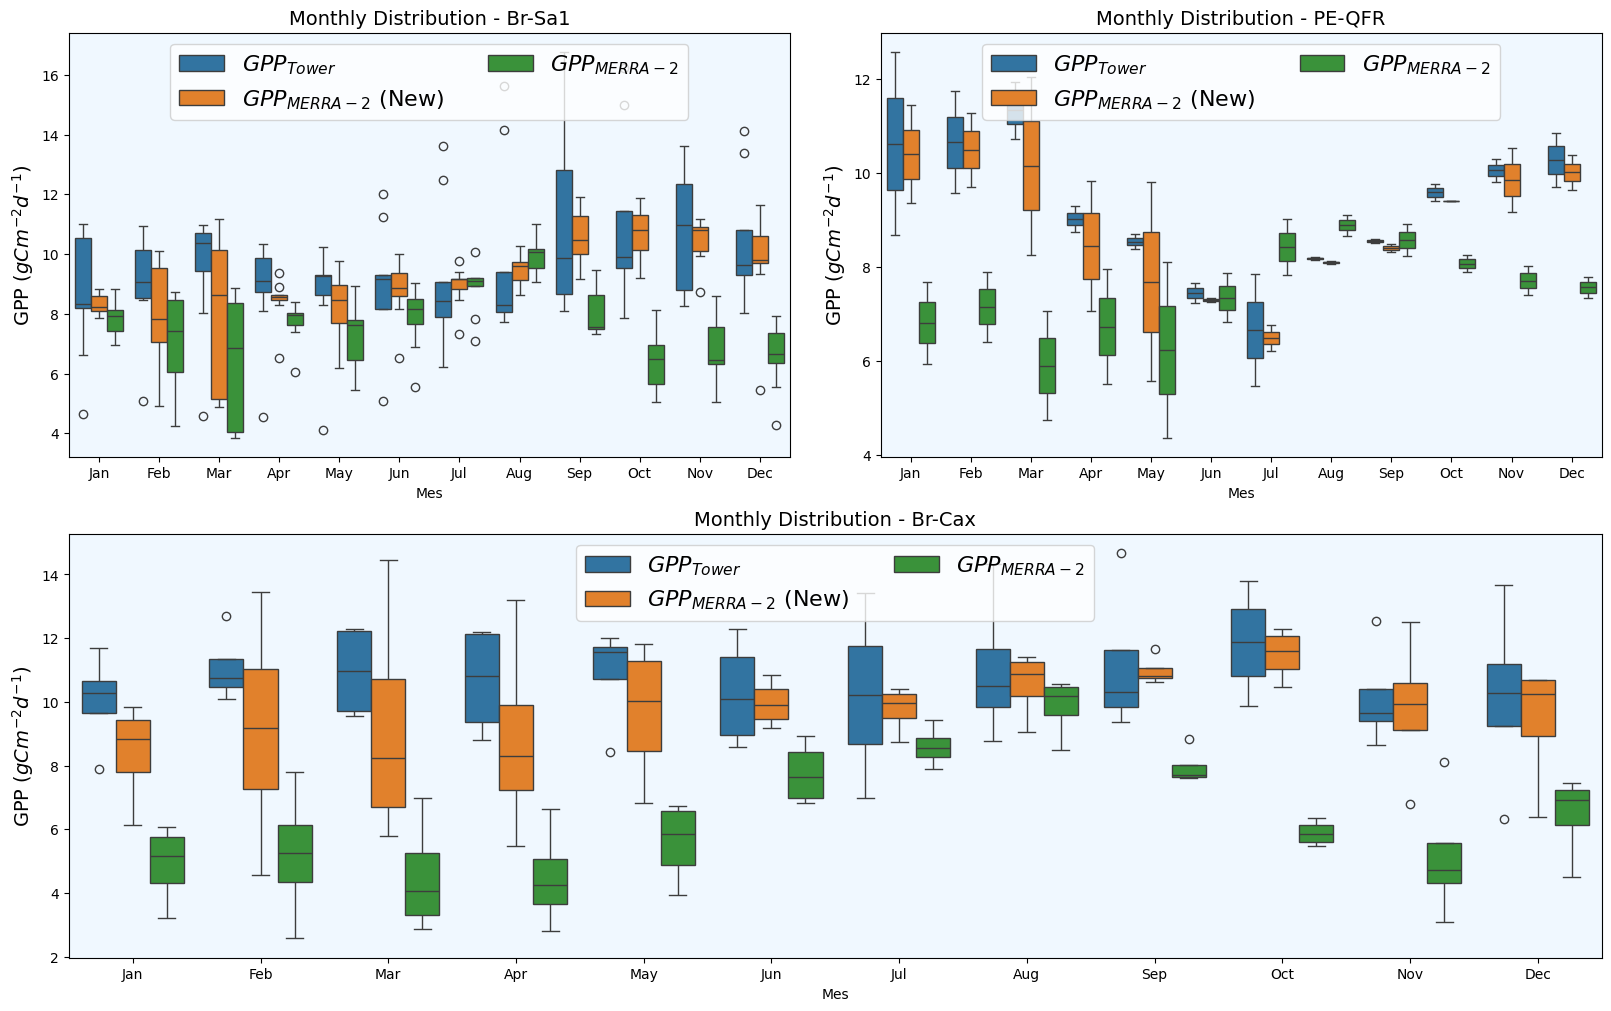

In [16]:
fig, axes = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower', 'lower']],
                              figsize=(16, 10), layout="constrained")

# Boxplot para Santarém
sns.boxplot(data=df_santarem_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes['upper left'])
axes['upper left'].set_title('Monthly Distribution - Br-Sa1', fontsize=14)  # Definindo título
axes['upper left'].set_ylabel('GPP ($gCm^{-2}d^{-1}$)', fontsize=14)  # Definindo rótulo do eixo y
#axes['upper left'].set_xlabel('Mês')  # Definindo rótulo do eixo x
axes['upper left'].legend(loc='upper center', fontsize=16, ncol=2)  # Definindo legenda
axes['upper left'].set_facecolor('#F0F8FF')

sns.boxplot(data=df_peru_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes['upper right'])
axes['upper right'].set_title('Monthly Distribution - PE-QFR', fontsize=14)  # Definindo título
axes['upper right'].set_ylabel('GPP ($gCm^{-2}d^{-1}$)', fontsize=14)  # Definindo rótulo do eixo y
#axes['upper right'].set_xlabel('Mês')  # Definindo rótulo do eixo x
axes['upper right'].legend(loc='upper center', fontsize=16, ncol=2)  # Definindo legenda
axes['upper right'].set_facecolor('#F0F8FF')

# Boxplot para caxiuana
sns.boxplot(data=df_caxiuana_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes['lower'])
axes['lower'].set_title('Monthly Distribution - Br-Cax', fontsize=14)  # Definindo título
axes['lower'].set_ylabel('GPP ($gCm^{-2}d^{-1}$)', fontsize=14)  # Definindo rótulo do eixo y
#axes['lower'].set_xlabel('Mês')  # Definindo rótulo do eixo x
axes['lower'].legend(loc='upper center', fontsize=16, ncol=2)  # Definindo legenda
axes['lower'].set_facecolor('#F0F8FF')



plt.savefig('BoxPlot_todos.png', dpi=300, bbox_inches='tight', pad_inches=0.2)  # Salvando figura

plt.show()